<center>
    <h1>Data Wrangling Project</h1>
    <h2>We Rate Dogs Twitter Archive</h2>
</center>

In [1]:
# Load required packages
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from functools import partial
import random
import re
import numpy as np

Key Points
Key points to keep in mind when data wrangling for this project:
<ul>
    <li>You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.</li>
    <li>Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset..</li>
    <li>Cleaning includes merging individual pieces of data according to the rules of tidy data..</li>
    <li>The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs..</li>
    <li>You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used..</li>
</ul>

## Gather

We will gather information from We Rate Dogs tweets archived in the file "twitter-archive-enhanced.csv" -- stored locally; gather tweet image preditions from the file "image-predictions.tsv" programmatically from Udacity's servers; gather retweets and likes directly from twitter by interfacing with twitters API. 

### Importing the twitter archive from a csv file

In [2]:
# import WeRateDogs archive to pandas dataframe

archive_df = pd.read_csv('twitter-archive-enhanced.csv')

### Download "image-predictions.tsv" programmatically from Udacity's servers and read into a dataframe.

In [3]:
# location of file on the internet
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# get the contents of the file and write contents to a file locally named after the original file name from the server.
response = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file :
    file.write(response.content)

# read the file into a dataframe.    
image_df = pd.read_csv('image-predictions.tsv', sep='\t')


### Download data from Twitter via Twitter API and save to 'tweet_json.txt' file

In [13]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'SECRET'
consumer_secret = 'SECRET'
access_token = 'SECRET'
access_secret = 'SECRET'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive_df.tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            outfile.write(str(tweet_id) + ' ' + str(tweet.retweet_count) + ' ' + str(tweet.favorite_count) + '\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start) 
print(fails_dict)



1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [10]:
fails_dict

{888202515573088257: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 873697596434513921: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872668790621863937: tweepy.error.TweepError([{'code': 34,
                           'message': 'Sorry, that page does not exist.'}]),
 869988702071779329: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 866816280283807744: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 861769973181624320: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 845459076796616705: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 842892208864923648: tweepy.error.TweepError([{'code': 144,


In [14]:
fails_dict

{888202515573088257: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 873697596434513921: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872668790621863937: tweepy.error.TweepError([{'code': 34,
                           'message': 'Sorry, that page does not exist.'}]),
 869988702071779329: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 866816280283807744: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 861769973181624320: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 845459076796616705: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 842892208864923648: tweepy.error.TweepError([{'code': 144,


### Create new 'retweets_faves_df' dataframe to append retweets and favorites count from JSON file to.

In [16]:
# create new dataframe for retweet counts and favorite counts.
retweets_faves_df = pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])


with open('tweet_json.txt','r') as file:
    for line in file:
        tweet_id,retweet_count,favorite_count=line[:-1].split(' ')
        retweets_faves_df = retweets_faves_df.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)


In [17]:
# check if datafram for retweets and favorites was created
retweets_faves_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8435,38401
1,892177421306343426,6216,32897
2,891815181378084864,4115,24796
3,891689557279858688,8555,41737
4,891327558926688256,9295,39910


## Assess

<ul>
    <li>Quality: issues with content. Low quality data is also known as dirty data.</li>
    <li>Tidiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data.</li>
    Tidy data requirements:
    <ol>
        <li>Each variable forms a column.</li>
        <li>Each observation forms a row.</li>
        <li>Each type of observational unit forms a table.</li>
    </ol>
</ul>
<br>
...using two types of assessment:
<ul>
    <li>Visual assessment: scrolling through the data in your preferred software application (Google Sheets, Excel, a text editor, etc.).</li>
    <li>Programmatic assessment: using code to view specific portions and summaries of the data (pandas' head, tail, and info methods, for example).</li>
</ul>

In [7]:
# visual assessment of archive_df
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
archive_df[archive_df.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [10]:
# create list of tweets that have missing photos and should be excluded in final dataframe
missing_photos = []
for x in archive_df.tweet_id :
    if len(image_df[image_df.tweet_id == x])==0 :
        missing_photos.append(x)
len(missing_photos)

281

In [11]:
# select randomly from missing_photos list to see if it exists in the image_df dataframe. It should not exist.
image_df[image_df.tweet_id == random.choice(missing_photos)]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [12]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
archive_df['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
Buddy          7
Toby           7
an             7
Daisy          7
Dave           6
Jack           6
Jax            6
Leo            6
Milo           6
Scout          6
Oscar          6
Bella          6
Stanley        6
Rusty          6
Koda           6
Chester        5
            ... 
Kawhi          1
Buddah         1
Sully          1
Gunner         1
Pancake        1
Binky          1
Kendall        1
Sailor         1
Naphaniel      1
Thor           1
Bobby          1
Banditt        1
Acro           1
Tupawc         1
Enchilada      1
Taz            1
Gilbert        1
Derby          1
Mollie         1
Tuck           1
Daniel         1
Duddles        1
Rolf           1
Marty          1
Noosh          1
Stefan         1
Perry          1
Benny         

In [14]:
# doggo                         2356 non-null object
# floofer                       2356 non-null object
# pupper                        2356 non-null object
# puppo                         2356 non-null object
print(archive_df.doggo.value_counts())
print(archive_df.floofer.value_counts())
print(archive_df.pupper.value_counts())
print(archive_df.puppo.value_counts())

w = archive_df.doggo.value_counts()[1]
x = archive_df.floofer.value_counts()[1]
y = archive_df.pupper.value_counts()[1]
z = archive_df.puppo.value_counts()[1]

print(w+x+y+z)

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64
394


In [15]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Quality
#### archive_df table

* tweet_id, in_reply_to_status_id and in_reply_to_user_id are not string format
* timestamp is not datetime type.
* there are retweeted messages
* there are tweets that do not include photos
* some of the dogs' names are None
* some of the dogs' names are 'a'
* some of the dogs' names are 'an'
* some of the dogs' names are not capitalized
* name, doggo, floofer, pupper, and puppo variables have string value equal to 'None'
* missing dog stages can be found in the text variable

### Tidiness
* doggo, floofer, pupper, puppo can be one column


In [16]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality
#### image_df table

* tweet_id is not string

### Tidiness
#### image_df table

* dog breed predictions has multiple predictions where some are unreliable and unnecessary to keep.

In [18]:
retweets_faves_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [19]:
retweets_faves_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


### Quality
#### retweets_faves_df table

* retweet_count and favorite_count are the wrong data type


## Final Assessment of All Datasets
### Quality
#### archive_df table

* tweet_id, in_reply_to_status_id and in_reply_to_user_id are not string format
* timestamp is not datetime type.
* there are retweeted messages
* there are tweets that do not include photos
* some of the dogs' names are None
* some of the dogs' names are 'a'
* some of the dogs' names are 'an'
* some of the dogs' names are not capitalized
* name, doggo, floofer, pupper, and puppo variables have string value equal to 'None'
* missing dog stages can be found in the text variable

#### image_df table

* tweet_id is not string

#### retweets_faves_df table

* retweet_count and favorite_count are the wrong data type

### Tidiness
#### archive_df table
* doggo, floofer, pupper, puppo can be one column

#### image_df table

* dog breed predictions has multiple predictions where some are unreliable and unnecessary to keep.

#### all tables
* multiple tables that have relevant information separate.

## Clean

I will create temporary dataframes for cleaning the data so I can make changes that I have a backup should the cleaning process damage or lose data.

In [20]:
archive_df_clean = archive_df.copy()
image_df_clean = image_df.copy()
retweets_faves_df_clean = retweets_faves_df.copy()

#### Define
#### Quality
##### archive_df table
* tweet_id, in_reply_to_status_id and in_reply_to_user_id are not string format
* timestamp is not datetime type

Use pd.to_datetime() to convert timestamp in archive_df_clean to datetime.

Use astype() to change tweet_id, in_reply_to_status_id and in_reply_to_user_id to string

#### Code

In [21]:
archive_df_clean.tweet_id = archive_df_clean.tweet_id.astype('str')
archive_df_clean.in_reply_to_status_id = archive_df_clean.in_reply_to_status_id.astype('str')
archive_df_clean.in_reply_to_user_id = archive_df_clean.in_reply_to_user_id.astype('str')

In [22]:
archive_df_clean.timestamp = pd.to_datetime(archive_df_clean.timestamp)

#### Test

In [23]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns

#### Define
#### Quality
##### archive_df table
* there are retweeted messages


Assign the restricted archive_df_clean dataframe excluding records with value in the retweeted_status_id back to archive_df_clean. 


#### Code

In [24]:
archive_df_clean = archive_df_clean[archive_df.retweeted_status_id.isnull()]

#### Test

In [25]:
# check there are any records with value in the retweeted_status_id variable. This should have no records
archive_df_clean[archive_df_clean.retweeted_status_id.notnull()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [26]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), 

#### Define
#### Quality
#### image_df table
tweet_id is not string
##### archive_df table
* there are tweets that do not include photos
Assign the restricted archive_df_clean dataframe excluding records without a corresponding value in the image_df_clean dataframe based on tweet_id. Need to convert tweet_id in image_df first so we properly determine which records don't have images.

#### Code

In [27]:
image_df_clean.tweet_id = image_df_clean.tweet_id.astype('str')

In [28]:
missing_photos = []
for x in archive_df_clean.tweet_id :
    if len(image_df_clean[image_df_clean.tweet_id == x])==0 :
        missing_photos.append(x)


In [29]:
archive_df_clean = archive_df_clean[~archive_df_clean.tweet_id.isin(missing_photos)]

#### Test

In [30]:
# check tweet_id data type
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [31]:
# check if there are any tweets missing images
missing_photos = []
for x in archive_df_clean.tweet_id :
    if len(image_df_clean[image_df_clean.tweet_id == x])==0 :
        missing_photos.append(x)
len(missing_photos)

0

In [32]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         1994 non-null object
in_reply_to_user_id           1994 non-null object
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: datetime64[ns](1), 

In [33]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define
#### Quality
##### archive_df table
* some of the dogs' names are None
* some of the dogs' names are 'a'
* some of the dogs' names are 'an'
* some of the dogs' names are not capitalized

Use replace() with str.capitalize() to capitalize lowercase names

The extract the right name from the text where it is available where it begins with 'name is' and 'named'.

Set and remaining 'none', 'an' and 'a' to NaN.

#### Code

In [34]:
name_is_df = archive_df_clean.loc[archive_df_clean['text'].str.contains('name is')]
named_df = archive_df_clean.loc[archive_df_clean['text'].str.contains('named')]

In [35]:
# create list of names from dataframe that starts with 'name is'
name = []

for x in name_is_df.text :
    y = x.split('name is ',1)[1]
    name.append(y.partition(' ')[0])

# remove '.'
name = [i.replace('.', '') for i in name]

name_is_df['name_2'] = name

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [36]:
# create list of names from dataframe that starts with 'named'
name = []

for x in named_df.text :
    y = x.split('named ',1)[1]
    name.append(y.partition('.')[0])

named_df['name_2'] = name

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
# assign name from named_df to corresponding record in the archive_df dataframe
for x in named_df.index :
    archive_df_clean.loc[x, 'name'] = named_df.loc[x, 'name_2']



In [38]:
# assign name from name_is_df to corresponding record in the archive_df dataframe
for x in name_is_df.index :
    archive_df_clean.loc[x, 'name'] = name_is_df.loc[x, 'name_2']

In [39]:
# check if there are any dogs named 'a' which the word 'name' exists in the text variable.
pd.set_option('display.max_colwidth', -1)
archive_df_clean.loc[(archive_df_clean.name == 'a') & (archive_df_clean.text.str.contains('name') )]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [40]:
# visually check if name can be found in text column
pd.set_option('display.max_colwidth', -1)
archive_df_clean.loc[(archive_df_clean.name == 'a')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,nan,nan,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,nan,nan,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,nan,nan,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,nan,nan,2016-06-28 20:14:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,nan,nan,2016-06-28 15:40:07,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,nan,nan,2016-06-26 01:08:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,nan,nan,2016-06-15 23:24:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,nan,nan,2016-04-06 02:21:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,nan,nan,2016-04-01 02:51:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Th

Visually found a record where the name is in the text but not in the name variable.

index: 649 
name: Forrest 

In [41]:
# visually check if name can be found in text column
pd.set_option('display.max_colwidth', -1)
archive_df_clean.loc[(archive_df_clean.name == 'an')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1025,746369468511756288,nan,nan,2016-06-24 15:48:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468511756288/photo/1,9,10,an,None,None,None,None
1362,703041949650034688,nan,nan,2016-02-26 02:20:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949650034688/photo/1,10,10,an,None,None,None,None
2333,666337882303524864,nan,nan,2015-11-16 19:31:45,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882303524864/photo/1,9,10,an,None,None,None,None
2335,666287406224695296,nan,nan,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,an,None,None,None,None
2349,666051853826850816,nan,nan,2015-11-16 00:35:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None


No name found in text

In [42]:
# update name variable based on the index discovered earlier. 
archive_df_clean.loc[649, 'name'] = 'Forrest'

In [43]:
# visually check if name can be found in text column
pd.set_option('display.max_colwidth', -1)
archive_df_clean.loc[(archive_df_clean.name == 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,nan,nan,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
24,887343217045368832,nan,nan,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,nan,nan,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
37,885167619883638784,nan,nan,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None
41,884441805382717440,nan,nan,2017-07-10 15:58:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805382717440/photo/1,14,10,None,None,None,None,None
47,883117836046086144,nan,nan,2017-07-07 00:17:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883117836046086144/photo/1,https://twitter.com/dog_rates/status/883117836046086144/photo/1",13,10,None,None,None,None,None
59,880872448815771648,nan,nan,2017-06-30 19:35:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf,NaN,NaN,NaN,htt

Visually found records where the name is in the text but not in the name variable.

* index = 157,  Boomer
* index = 177, Meeko
* index = 184, Charlie


In [44]:
# update name variable based on the indices discovered above. 
archive_df_clean.loc[157, 'name'] = 'Boomer'
archive_df_clean.loc[177, 'name'] = 'Meeko'
archive_df_clean.loc[184, 'name'] = 'Charlie'

Make sure all the names begin in uppercase

In [45]:
archive_df_clean.name = archive_df_clean.name.str.capitalize()

Change all name values that are 'None' and 'a' to NaN.

In [46]:
archive_df_clean.name = archive_df_clean.name.replace('None', np.nan)
archive_df_clean.name = archive_df_clean.name.replace('A', np.nan)
archive_df_clean.name = archive_df_clean.name.replace('An', np.nan)

#### Test

In [47]:
archive_df_clean.name.value_counts()

Charlie       12
Lucy          10
Cooper        10
Oliver        10
Penny         9 
Tucker        9 
Sadie         8 
Winston       8 
The           7 
Daisy         7 
Toby          7 
Lola          7 
Stanley       6 
Jax           6 
Koda          6 
Bo            6 
Bella         6 
Leo           5 
Rusty         5 
Bailey        5 
Buddy         5 
Oscar         5 
Scout         5 
Zoey          5 
Louis         5 
Milo          5 
Chester       5 
Dave          5 
Dexter        4 
Cassie        4 
             .. 
Barclay       1 
Farfle        1 
Finnegus      1 
Newt          1 
Stefan        1 
Noosh         1 
Marty         1 
Rolf          1 
Gordon        1 
Mabel         1 
Grey          1 
Bertson       1 
Vinscent      1 
Rocco         1 
Ebby          1 
Jarvis        1 
Bell          1 
Bobby         1 
Banditt       1 
Acro          1 
Tupawc        1 
Enchilada     1 
Gilbert       1 
Officially    1 
Naphaniel     1 
Mollie        1 
Daniel        1 
Duddles       

#### Define
#### Quality
##### archive_df table
* name, doggo, floofer, pupper, and puppo variables have string value equal to 'None'
* missing dog stages can be found in the text variable

#### Tidiness
##### archive_df table
* doggo, floofer, pupper, puppo can be one column

Use melt to combine to a single column called 'stage'.

Try to fill any missing data

#### Code

In [48]:
# define columns to keep and columns to melt
melt_cols = ['doggo', 'floofer', 'pupper', 'puppo']
keep_cols = [x for x in archive_df_clean.columns.tolist() if x not in melt_cols]

archive_df_clean = pd.melt(archive_df_clean, id_vars = keep_cols, value_vars = melt_cols, var_name = 'stages', value_name = 'stage')

# drop unnecessary new column
archive_df_clean = archive_df_clean.drop('stages', 1)

# drop duplicated records
archive_df_clean = archive_df_clean.sort_values('stage').drop_duplicates('tweet_id', keep = 'last')


I created tables that would find out if the words 'dog', 'floo', 'pup', 'puppo'. I decided to shorten 'doggo' to 'dog' because the instances that 'dog' is found in the text, it is safe to assume the dog is an adult. I shorted 'floofer' to 'floo' because there have been variations in the text 'floofer' but always starts with 'floo'. I decided to first assign anything that begins with 'pup' to 'pupper' first and then if anything is actually 'puppo', I would assign 'puppo' accordingling.

In [49]:
doggo = archive_df_clean.loc[archive_df_clean['text'].str.contains('dog')]
floofer = archive_df_clean.loc[archive_df_clean['text'].str.contains('floo')]
pupper = archive_df_clean.loc[archive_df_clean['text'].str.contains('pup')]
puppo = archive_df_clean.loc[archive_df_clean['text'].str.contains('puppo')]


In [50]:
# assign the stage based on the text variable to the stage variable

for i in doggo.index :
    archive_df_clean.loc[i, 'stage'] = 'doggo'

for i in floofer.index :
    archive_df_clean.loc[i, 'stage'] = 'floofer'

for i in pupper.index :
    archive_df_clean.loc[i, 'stage'] = 'pupper'
    
for i in puppo.index :
    archive_df_clean.loc[i, 'stage'] = 'puppo'

In [51]:
# Assign NaN to all 'None' values
archive_df_clean.stage = archive_df_clean.stage.replace('None', np.nan)


#### Test

In [52]:
print(archive_df_clean.stage.value_counts())
print(len(archive_df_clean))

pupper     451
doggo      329
floofer    29 
puppo      29 
Name: stage, dtype: int64
1994


In [53]:
# visually check if none can be found in stage column
pd.set_option('display.max_colwidth', -1)
archive_df_clean.loc[archive_df_clean.stage == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage


#### Define
#### Quality
##### retweets_faves_df table

* retweet_count and favorite_count are the wrong data type

Change all columns to INT. 

#### Code

In [54]:
retweets_faves_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [55]:
# convert tweet_id to int then back to object
retweets_faves_df_clean.tweet_id = retweets_faves_df_clean.tweet_id.astype('int64')
retweets_faves_df_clean.tweet_id = retweets_faves_df_clean.tweet_id.astype('str')

# change datatype from object to int
retweets_faves_df_clean.retweet_count = retweets_faves_df_clean.retweet_count.astype('int64')
retweets_faves_df_clean.favorite_count = retweets_faves_df_clean.favorite_count.astype('int64')

The reason I had to convert the tweet_id variable from object to int then back to object is that I found that I could not merge on the variables as it is. I tried to remove any white spaces initially but I still could not match the tweet_id with the tweet_ids on other tables.

#### Test

In [56]:
retweets_faves_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


#### Define
#### Tidiness
##### image_df table

* dog breed predictions has multiple predictions where some are unreliable and unnecessary to keep.

Drop range of columns from "p1_dog" to "p3_dog" columns. If the "p1_dog" column is false, change p1 to NaN.

#### Code

In [57]:
# If the p1 dog prediction is not a dog breed, take from p2 or p3 if it exists

for i in image_df_clean.index :
    if image_df_clean.loc[i, 'p1_dog'] == False :
        if image_df_clean.loc[i, 'p2_dog'] == True :
            image_df_clean.loc[i, 'p1'] = image_df_clean.loc[i, 'p2']
            image_df_clean.loc[i, 'p1_conf'] = image_df_clean.loc[i, 'p2_conf']
            image_df_clean.loc[i, 'p1_dog'] = image_df_clean.loc[i, 'p2_dog']
        elif image_df_clean.loc[i, 'p3_dog'] == True :
            image_df_clean.loc[i, 'p1'] = image_df_clean.loc[i, 'p3']
            image_df_clean.loc[i, 'p1_conf'] = image_df_clean.loc[i, 'p3_conf']
            image_df_clean.loc[i, 'p1_dog'] = image_df_clean.loc[i, 'p3_dog']


In [58]:
# change p1 value to 'NaN' if the p1_dog value is FALSE
for i in image_df_clean.index :
    if image_df_clean.loc[i, 'p1_dog'] == False :
        image_df_clean.loc[i, 'p1'] = np.nan
        image_df_clean.loc[i, 'p1_conf'] = 0

In [59]:
# Check column names in the dataframe 
image_df_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [60]:
# drop the range of columns
image_df_clean = image_df_clean.drop(image_df_clean.columns.to_series()["p1_dog":"p3_dog"], axis=1)

In [61]:
# rename 'p1' and 'p1_conf' to 'predicted_breed' and 'confidence_level'
image_df_clean.rename(columns={'p1':'predicted_breed', 'p1_conf':'confidence_level'}, inplace=True)

#### Test

In [62]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id            2075 non-null object
jpg_url             2075 non-null object
img_num             2075 non-null int64
predicted_breed     1751 non-null object
confidence_level    2075 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.1+ KB


In [63]:
image_df_clean.sample(5)

,tweet_id,jpg_url,img_num,predicted_breed,confidence_level
1115,724983749226668032,https://pbs.twimg.com/media/Cg-o3w0WgAANXdv.jpg,1,golden_retriever,0.675750
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004
1192,739979191639244800,https://pbs.twimg.com/media/CkTvJTdXAAAEfbT.jpg,1,Irish_water_spaniel,0.285800
210,669993076832759809,https://pbs.twimg.com/media/CUxLJO8U8AAu6Zu.jpg,1,toy_poodle,0.086502
1113,724405726123311104,https://pbs.twimg.com/media/Cg2bKLAWwAA0WEm.jpg,1,golden_retriever,0.240695


#### Define
#### Tidiness
##### all tables
* combine all the tables to a single table "wrd_df"

remove unnecessary columns 'retweeted_status_id,' 'retweeted_status_user_id,' and 'retweeted_status_timestamp' because we are not considering retweeted posts in this study.

#### Code

In [64]:
# merge archive_df_clean and image_df_clean to wrd_df
wrd_df = pd.merge(archive_df_clean, image_df_clean, on = 'tweet_id', how = 'left')

In [65]:
wrd_df = pd.merge(wrd_df, retweets_faves_df_clean, on = 'tweet_id', how = 'left')

In [66]:
wrd_df = wrd_df.drop(wrd_df.columns.to_series()["retweeted_status_id":"retweeted_status_timestamp"], axis=1)

#### Test

In [67]:
# check if each archived_df record has matched with a image_df record
wrd_df[wrd_df.retweet_count.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,predicted_breed,confidence_level,retweet_count,favorite_count


In [68]:
# check if each archived_df record has matched with a retweets_faves_df record
wrd_df[wrd_df.retweet_count.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,predicted_breed,confidence_level,retweet_count,favorite_count


In [69]:
wrd_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,predicted_breed,confidence_level,retweet_count,favorite_count
0,667405339315146752,nan,nan,2015-11-19 18:13:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,NaN,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,234,489
1,667435689202614272,nan,nan,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,NaN,NaN,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,89,326
2,667437278097252352,nan,nan,2015-11-19 20:20:22,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10,10,NaN,pupper,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,NaN,0.000000,257,483
3,667443425659232256,nan,nan,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6,10,NaN,doggo,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,NaN,0.000000,620,833
4,667453023279554560,nan,nan,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11,10,Cupcake,NaN,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,96,327
5,667455448082227200,nan,nan,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,https://twitter.com/dog_rates/status/667455448082227200/photo/1,7,10,Reese,NaN,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan_terrier,0.676376,66,203
6,667470559035432960,nan,nan,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11,10,Kohl,NaN,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,102,273
7,667491009379606528,nan,nan,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7,10,NaN,doggo,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,242,559
8,667495797102141441,nan,nan,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9,10,Philippe,NaN,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,294,565
9,667502640335572993,nan,nan,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic

### Store Date to CSV

Export the new dataframe to a new csv file called 'wrd_twitter_archive.csv'

In [70]:
wrd_df.to_csv('twitter_archive_master.csv', index = False)

### Visualizations

In [71]:
wrd_df.describe()

,rating_numerator,rating_denominator,img_num,confidence_level,retweet_count,favorite_count
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,12.280843,10.532096,1.203109,0.464991,2766.753260,8895.725677
std,41.497718,7.320710,0.560777,0.339470,4674.698447,12213.193181
min,0.000000,2.000000,1.000000,0.000000,16.000000,81.000000
25%,10.000000,10.000000,1.000000,0.140466,624.750000,1982.000000
50%,11.000000,10.000000,1.000000,0.459130,1359.500000,4136.000000
75%,12.000000,10.000000,1.000000,0.776387,3220.000000,11308.000000
max,1776.000000,170.000000,4.000000,0.999956,79515.000000,132810.000000


#### Retweets vs Favorites

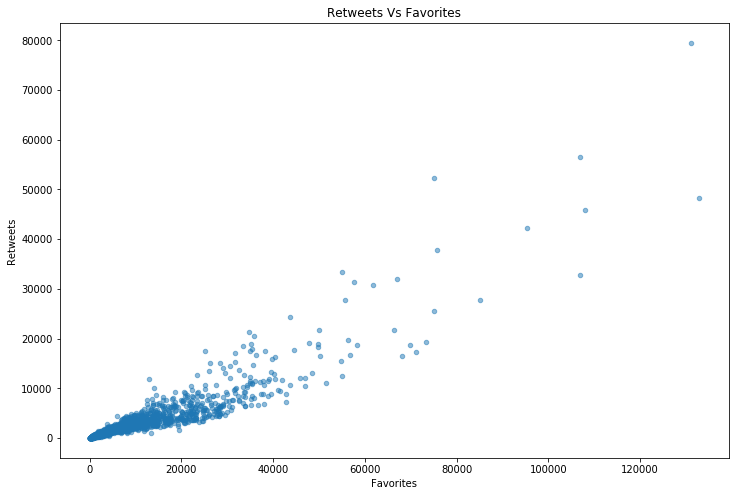

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline


wrd_df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, figsize = (12,8))
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets Vs Favorites');

As we can see from the scatter plot, there is a positive correlation between the number of favorites the tweet gets and the number of retweets.

In [73]:
# most predicted breeds

wrd_df.predicted_breed.value_counts()

golden_retriever                  158
Labrador_retriever                108
Pembroke                          95 
Chihuahua                         91 
pug                               62 
toy_poodle                        51 
chow                              48 
Samoyed                           42 
Pomeranian                        42 
malamute                          33 
French_bulldog                    31 
Chesapeake_Bay_retriever          31 
cocker_spaniel                    30 
miniature_pinscher                25 
Eskimo_dog                        22 
Staffordshire_bullterrier         21 
German_shepherd                   21 
Cardigan                          21 
beagle                            20 
Shih-Tzu                          20 
Siberian_husky                    20 
Shetland_sheepdog                 19 
Rottweiler                        19 
Maltese_dog                       19 
Lakeland_terrier                  18 
kuvasz                            18 
Italian_grey

We can see that Golden retreivers are the most common predicted breed. What if we checked how that number holds up as we vary minimum confidence levels?

In [74]:
wrd_df.loc[wrd_df.confidence_level >= 0.75].predicted_breed.value_counts()

golden_retriever                  78
Pembroke                          47
Labrador_retriever                41
pug                               34
Chihuahua                         25
Samoyed                           22
Pomeranian                        22
chow                              16
French_bulldog                    14
toy_poodle                        13
malamute                          10
German_shepherd                   9 
Maltese_dog                       8 
Shetland_sheepdog                 8 
Bernese_mountain_dog              7 
Chesapeake_Bay_retriever          7 
Brittany_spaniel                  6 
Blenheim_spaniel                  6 
miniature_pinscher                6 
beagle                            5 
cocker_spaniel                    5 
Old_English_sheepdog              5 
Doberman                          5 
dalmatian                         5 
Rottweiler                        5 
American_Staffordshire_terrier    5 
basset                            5 
G

In [75]:
wrd_df.loc[wrd_df.confidence_level >= 0.95].predicted_breed.value_counts()

pug                            20
Samoyed                        19
Pembroke                       19
golden_retriever               16
Pomeranian                     13
Chihuahua                      9 
Labrador_retriever             9 
French_bulldog                 8 
chow                           7 
German_shepherd                4 
Bernese_mountain_dog           4 
Shetland_sheepdog              4 
Blenheim_spaniel               3 
Old_English_sheepdog           3 
Pekinese                       3 
beagle                         3 
malamute                       2 
Rottweiler                     2 
vizsla                         2 
komondor                       2 
dalmatian                      2 
Boston_bull                    2 
English_springer               2 
Saint_Bernard                  2 
Shih-Tzu                       2 
keeshond                       2 
basset                         2 
cocker_spaniel                 2 
bull_mastiff                   2 
miniature_pins

In [76]:
wrd_df.stage.value_counts()

pupper     451
doggo      329
floofer    29 
puppo      29 
Name: stage, dtype: int64

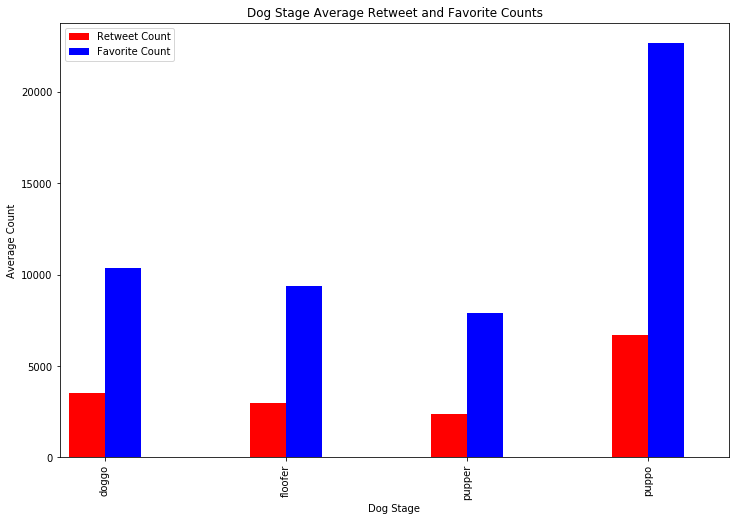

In [77]:


# fig = 
# ax = fig.add_subplot(111) # Create matplotlib axes
# ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.


plt.figure(figsize = (12,8))
width = 0.2

wrd_df.groupby('stage').retweet_count.mean().plot(kind='bar', color='red', width=width, position=1)
wrd_df.groupby('stage').favorite_count.mean().plot(kind='bar', color='blue',width=width, position=0)



plt.xlabel('Dog Stage')
plt.ylabel('Average Count')
plt.legend(['Retweet Count', 'Favorite Count'])
plt.title('Dog Stage Average Retweet and Favorite Counts')


plt.show()